<a href="https://colab.research.google.com/github/Ms-Shaukat/DataAnalyticsProjectsandPortfolio/blob/main/Python_Projects%20/python_project_1/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Sentiment Analysis**
---
This project is about sentimemtal anlysis by using the dataset tweets.csv 

In [ ]:
#Uploading csv file into Colab
from google.colab import files
uploaded = files.upload()


Saving tweets.csv to tweets.csv


In [ ]:
import pandas as pds
# Load the CSV dataset into a pandas DataFrame
df = pds.read_csv("tweets.csv")

Import different Libraries to perform different word analysis functionality and cleansing 



In [ ]:
#decalring the other libraries
import seaborn as sns
import re                                       # Import the re library for regular expressions
from textblob import TextBlob                    # Import TextBlob for text processing
import string                                   # Import the string library for handling punctuation
from nltk.corpus import stopwords               # Import NLTK's stopwords for removing common words
from nltk.tokenize import word_tokenize         # Import NLTK's word_tokenize for tokenizing words
from nltk.stem import WordNetLemmatizer          # Import NLTK's WordNetLemmatizer for lemmatizing words
from collections import Counter

import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**List of task to perform Data cleaning including removals of URL, Emojis, stopwords, mentions, Hashtags, and punctuation signs.**

In [ ]:
# remove urls
df['tweet_cleaned'] = df['Tweets'].apply(lambda text: re.sub("https?:\/\/[a-z0-9-]+(?:\.[a-z0-9-]+)+[/?#]\S*", "", text))
print(df.head(5))

                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                                   tweet_cleaned  \
0  2022-10-27 16:17:39                           @PeterSchiff 🤣 thanks   
1  2022-10-27 13:19:25                           @ZubyMusic Absolutely   
2  2022-10-27 13:08:00                       Dear Twitter Advertisers    
3  2022-10-27 02:32:48                                     @BillyM2k 👻   
4  2022-10-26 21:39:32  Meeting a lot of cool people at Twitter today!   

   Polarity  
0      0.20  
1      0.20  
2      0.00  
3      0.00  
4      0.35  


In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: " ".join([word for word in text.split() if word not in stop_words]))
print(df.head(5)) #Stopwords removals result


                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                           tweet_cleaned  Polarity  
0  2022-10-27 16:17:39                   @PeterSchiff 🤣 thanks      0.20  
1  2022-10-27 13:19:25                   @ZubyMusic Absolutely      0.20  
2  2022-10-27 13:08:00                Dear Twitter Advertisers      0.00  
3  2022-10-27 02:32:48                             @BillyM2k 👻      0.00  
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today!      0.35  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: re.sub("@\S+", "", text))
print(df.head(5)) #mentions removals result

                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                           tweet_cleaned  Polarity  
0  2022-10-27 16:17:39                                🤣 thanks      0.20  
1  2022-10-27 13:19:25                              Absolutely      0.20  
2  2022-10-27 13:08:00                Dear Twitter Advertisers      0.00  
3  2022-10-27 02:32:48                                       👻      0.00  
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today!      0.35  


In [ ]:
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: re.sub("#", "", text))
print(df.head(5)) ##hashtags removals result

                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                           tweet_cleaned  Polarity  
0  2022-10-27 16:17:39                                🤣 thanks      0.20  
1  2022-10-27 13:19:25                              Absolutely      0.20  
2  2022-10-27 13:08:00                Dear Twitter Advertisers      0.00  
3  2022-10-27 02:32:48                                       👻      0.00  
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today!      0.35  


In [ ]:
import string
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))
print(df.head(5))#puntuation signs removals result

                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                          tweet_cleaned  Polarity  
0  2022-10-27 16:17:39                               🤣 thanks      0.20  
1  2022-10-27 13:19:25                             Absolutely      0.20  
2  2022-10-27 13:08:00               Dear Twitter Advertisers      0.00  
3  2022-10-27 02:32:48                                      👻      0.00  
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today      0.35  


In [ ]:
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: re.sub(r'\bRT\b', '', text))
print(df.head(5)) #RT removals result

                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                          tweet_cleaned  Polarity  
0  2022-10-27 16:17:39                               🤣 thanks      0.20  
1  2022-10-27 13:19:25                             Absolutely      0.20  
2  2022-10-27 13:08:00               Dear Twitter Advertisers      0.00  
3  2022-10-27 02:32:48                                      👻      0.00  
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today      0.35  


In [ ]:
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda text: ''.join(i for i in text if i <= '\uFFFF'))
print(df.head())#Emojis removals result

                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                          tweet_cleaned  Polarity  
0  2022-10-27 16:17:39                                 thanks      0.20  
1  2022-10-27 13:19:25                             Absolutely      0.20  
2  2022-10-27 13:08:00               Dear Twitter Advertisers      0.00  
3  2022-10-27 02:32:48                                             0.00  
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today      0.35  


In [ ]:
df['tweet_cleaned'] = df['tweet_cleaned'].str.strip()
print(df.head(5)) #whitespace triming result

                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                          tweet_cleaned  Polarity  
0  2022-10-27 16:17:39                                 thanks      0.20  
1  2022-10-27 13:19:25                             Absolutely      0.20  
2  2022-10-27 13:08:00               Dear Twitter Advertisers      0.00  
3  2022-10-27 02:32:48                                             0.00  
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today      0.35  


In [ ]:
lemmatizer = WordNetLemmatizer()
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))


In [ ]:
df['tweet_cleaned'] = df['tweet_cleaned'] 
print(df.head(5))
#I already stored everything inside this new column and updating it on every step. I didn't create function as it'll the reptetion of cide

                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                          tweet_cleaned  Polarity  
0  2022-10-27 16:17:39                                 thanks      0.20  
1  2022-10-27 13:19:25                             Absolutely      0.20  
2  2022-10-27 13:08:00               Dear Twitter Advertisers      0.00  
3  2022-10-27 02:32:48                                             0.00  
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today      0.35  


## Analyze tweet whether it's Positive or Negative
First Calculate Polarity

In [ ]:
from textblob import TextBlob

# Create a function to get the polarity
def getPolarity (twt):
  return TextBlob(twt).sentiment.polarity

# Create a new column to save the results of the created function
df['Polarity'] = df['tweet_cleaned'].apply(getPolarity)
print(df.head())

                                             Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date                          tweet_cleaned  Polarity  
0  2022-10-27 16:17:39                                 thanks      0.20  
1  2022-10-27 13:19:25                             Absolutely      0.20  
2  2022-10-27 13:08:00               Dear Twitter Advertisers      0.00  
3  2022-10-27 02:32:48                                             0.00  
4  2022-10-26 21:39:32  Meeting lot cool people Twitter today      0.35  


Add a column sentiment to the dataframe. If the polarity is > 0, the sentiment is positive. If it is < 0, the sentiment is negative. Else, the sentiment is neutral. 

In [ ]:
# Create a function to find a polarity values to sentiment column

def get_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a 'sentiment' column 
df['sentiment'] = df['Polarity'].apply(get_sentiment)

# Display the first 5 rows of the updated dataframe
df.head(5)

,Tweets,Retweets,Likes,Date,tweet_cleaned,Polarity,sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.20,positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,neutral
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,0.00,neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today,0.35,positive


**Visual Representation **of how sentiment is distributed in the dataset?

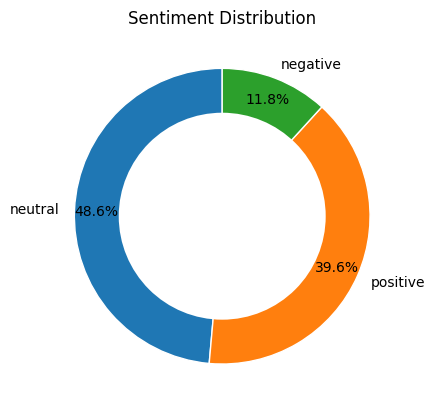

In [ ]:
# Get the sentiment value count
sentiment_counts = df['sentiment'].value_counts()

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'edgecolor': 'white'})
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)
ax.set_title('Sentiment Distribution')

plt.show()

## **My Comment on above Plot**
---

### The given data set shows neutral sentiments meaning that maximum number of tweets doesn't represents any sentiment or used neutral sentimental words. However, second highest percentage show positive sentiments that represents usage of good words and only 11.8% data reflects the negative or negative polarity

What are the 10 most common words in each sentiment?

In [ ]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Get stopwords
stop_words = set(stopwords.words('english'))

# Function to get the most common words from a text
def get_most_common_words(text, n=10):
    tokens = nltk.word_tokenize(text)
    # Filter out stop words
    tokens = [token for token in tokens if token.lower() not in stop_words]
    fdist = FreqDist(tokens)
    return fdist.most_common(n)

# Group tweets by sentiment
sentiment_groups = df.groupby('sentiment')

# Loop through each sentiment and get the most common words
for sentiment, group in sentiment_groups:
    print('Sentiment:', sentiment)
    tweets = ' '.join(group['tweet_cleaned'])
    common_words = get_most_common_words(tweets)
    print(common_words)
    print()


Sentiment: negative
[('’', 117), ('amp', 88), ('Tesla', 31), ('year', 23), ('would', 19), ('“', 18), ('”', 18), ('time', 18), ('one', 17), ('people', 17)]

Sentiment: neutral
[('’', 119), ('Yes', 63), ('…', 47), ('amp', 43), ('Tesla', 40), ('Yeah', 31), ('year', 30), ('”', 26), ('Starlink', 26), ('time', 26)]

Sentiment: positive
[('’', 285), ('amp', 154), ('Tesla', 79), ('people', 64), ('many', 61), ('much', 60), ('good', 60), ('would', 58), ('time', 52), ('Twitter', 51)]

